<a href="https://colab.research.google.com/github/esusrutha/zeroshot/blob/main/zeroshot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install nltk networkx

In [ ]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.2 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=4a5acb2be96b4b85b043c9974275c5ff7e5cdc888ce0ec44e087ddfe6795f569
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


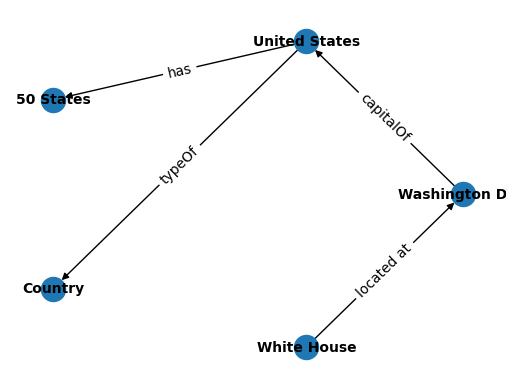

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import requests

# Define the nodes and relations
knowledge_graph = [
    ('Washington D.C.', 'capitalOf', 'United States'),
    ('United States', 'has', '50 States'),
    ('United States', 'typeOf', 'Country'),
    ('White House', 'located at', 'Washington D.C.')
]

# Create a NetworkX graph
graph = nx.DiGraph()  # Use DiGraph instead of Graph to indicate directed edges

# Iterate through the knowledge graph and retrieve additional information from ConceptNet API
for edge in knowledge_graph:
    source = edge[0]
    relation = edge[1]
    target = edge[2]

    # Make a request to ConceptNet API to fetch additional information
    api_url = f'http://api.conceptnet.io/c/en/{source}?rel=/r/{relation}&end=/c/en/{target}'
    response = requests.get(api_url)
    if response.status_code == 200:
        data = response.json()

        # Extract the weight from the API response
        weight = 1.0  # Default weight if not found
        if 'edges' in data and len(data['edges']) > 0 and 'weight' in data['edges'][0]:
            weight = data['edges'][0]['weight']

        # Add directed edges to the graph
        graph.add_edge(source, target, relation=relation, weight=weight)

# Set node positions using a circular layout
pos = nx.circular_layout(graph)

# Draw nodes and edges with arrowheads
nx.draw_networkx_nodes(graph, pos)
nx.draw_networkx_edges(graph, pos, arrows=True)  # Set arrows=True for directed edges

# Draw node labels
nx.draw_networkx_labels(graph, pos, font_size=10, font_weight='bold')

# Draw edge labels
edge_labels = nx.get_edge_attributes(graph, 'relation')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

# Display the graph
plt.axis('off')
plt.show()
Knowledge_graph = graph

In [ ]:
sentences = []
for edge in knowledge_graph:
    source = edge[0]
    relation = edge[1]
    target = edge[2]
    sentence = f"{source} {relation} {target}"
    sentences.append(sentence)
    print(sentences)

['Washington D.C. capitalOf United States']
['Washington D.C. capitalOf United States', 'United States has 50 States']
['Washington D.C. capitalOf United States', 'United States has 50 States', 'United States typeOf Country']
['Washington D.C. capitalOf United States', 'United States has 50 States', 'United States typeOf Country', 'White House located at Washington D.C.']


In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
from collections import Counter

tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
word_counts = Counter([word for sentence in tokenized_sentences for word in sentence])
vocabulary = list(word_counts.keys())


In [ ]:
import gensim.downloader as api

glove_model = api.load('glove-wiki-gigaword-100')


In [ ]:
word_vectors = {word: glove_model[word] for word in vocabulary if word in glove_model}


In [ ]:
knowledge_graph_embedding = []
for sentence in tokenized_sentences:
    sentence_vectors = [word_vectors[word] for word in sentence if word in word_vectors]
    if sentence_vectors:
        avg_vector = sum(sentence_vectors) / len(sentence_vectors)
        knowledge_graph_embedding.append(avg_vector)


In [ ]:
for embedding in knowledge_graph_embedding:
    print(embedding)


[ 0.082152    0.55732     0.21405199 -0.16241     0.42663002  0.048215
  0.1606735   0.3552     -0.4085225   0.301615    0.486645    0.210105
  0.3953655  -0.216695    0.14228499 -0.3276575   0.170604    0.01015884
 -0.22224998  0.408855    0.716245    0.38815     0.229665    0.1888445
  0.1262655  -0.26332998  0.10853501 -0.49602    -0.13658501 -0.309505
  0.221355    0.83281    -0.1230765   0.50250953  0.216965    0.37953
  0.347665    0.320747   -0.43827     0.3622775  -0.57938    -0.409445
  0.49532    -0.437855    0.300685   -0.1923815   0.19572002 -0.60129
  0.13566    -0.44006002 -0.13332    -0.609985   -0.016055    1.187455
 -0.40245003 -2.34165    -0.45047498 -0.33754     1.42215     0.95134
  0.393505    0.49286503 -0.1311105   0.042498    0.458041    0.20169501
  0.41669     0.183621    0.643355    0.030459    0.16112001 -0.182584
 -0.182766    0.3262085   0.270055   -0.33693    -0.029077    0.05824
 -1.1489251   0.1366485   0.960795   -0.12854001 -0.1505925  -0.249093
 -1.2

In [ ]:
print(embedding.shape)

(100,)


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
from transformers import AutoTokenizer

# Load the pre-trained S-BERT model tokenizer
model_name = "sentence-transformers/all-MiniLM-L6-v2"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Download the list of common English words from nltk
nltk.download("words")
common_words = set(nltk.corpus.words.words())

# Get the vocabulary words from the S-BERT model
vocab = tokenizer.get_vocab()
vocab_words = list(vocab.keys())

# Filter the vocabulary words to keep only the common English words
common_vocab_words = [word for word in vocab_words if word.lower() in common_words]

# Get the most common vocabulary words based on their frequencies
top_n = 100
common_vocab_freqs = [vocab[word] for word in common_vocab_words]
most_common_vocab = sorted(zip(common_vocab_words, common_vocab_freqs), key=lambda x: x[1], reverse=True)[:top_n]

# Store the most common vocabulary words in a list
stored_words = [word for word, _ in most_common_vocab]

# Print the stored vocabulary words
for word in stored_words:
    print(word)


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


thyroid
nitrate
genealogical
dowry
collarbone
arsenic
pudding
disgrace
wreath
wince
inhuman
bobbed
papyrus
flourishing
penitentiary
inflated
boredom
abolitionist
squeak
enthusiast
infiltrate
upstate
rosewood
patrice
vet
foreigner
colossal
earthly
deprivation
taluka
stanza
embroidery
adventurer
unbroken
lough
adamant
polka
boardwalk
reindeer
attache
persist
enamel
effortlessly
yearning
loosen
ie
decorate
covent
strive
tread
holster
streamlined
seeker
taunting
unfit
stillness
bop
britten
sighting
juniper
moderator
elliptic
erroneously
figurative
aground
cinder
bipolar
rhapsody
delaying
vinegar
shouldered
foo
stampede
armchair
quadrant
tidy
piccolo
vulgar
fulfillment
compassionate
apologetic
amazingly
nay
irritating
ae
undeveloped
mangrove
nosed
distal
compressor
dung
unofficially
discreet
bien
mania
contentious
cleric
indices
markedly
geek


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')
vocabulary_embeddings=model.encode(stored_words)
print(vocabulary_embeddings)


[[-3.8380921e-02  1.3844410e-02  5.0948430e-03 ...  6.4140186e-02
   1.1741676e-01 -3.9527258e-03]
 [-3.7052069e-02 -8.4874360e-03  6.0293154e-04 ... -3.5221867e-02
   8.7065175e-02  2.5798377e-02]
 [-7.2317772e-02  7.2963135e-03 -2.5461772e-02 ...  2.3224093e-02
   3.2639783e-02 -1.2676468e-02]
 ...
 [ 2.2606410e-02  2.9712142e-02  1.3109762e-03 ... -9.9349460e-03
  -3.7202500e-02 -8.5346565e-02]
 [ 6.9983475e-02  1.9223118e-04  2.6189251e-02 ... -2.5095787e-05
   1.0565958e-02 -9.0330489e-02]
 [-5.8677170e-02  2.5966318e-02  4.0841013e-02 ...  5.4054584e-02
   2.5494987e-02 -7.9530112e-02]]


In [ ]:
print(vocabulary_embeddings.shape)

(100, 384)


In [ ]:
word_vectors = {word: glove_model[word] for word in stored_words if word in glove_model}

In [ ]:
knowledge_graph_embedding = []
for word in stored_words:
    if word in word_vectors:
        word_vector = word_vectors[word]
        knowledge_graph_embedding.append(word_vector)

for embeddings in knowledge_graph_embedding:
    print(embeddings)


[ 0.48893   0.323    -0.5664    0.54652  -0.75107  -0.17408   0.095883
  0.6351    0.47999   0.74358   0.032241 -0.31264  -0.33028  -0.16298
  0.53532   0.11402   0.030276 -0.43082   1.0655   -0.57941  -1.0389
 -0.51304  -0.36444   0.966    -0.23017   0.79514   0.13084  -0.87703
  0.75949   0.95471   1.0031   -0.39215   0.44971   0.066119  0.38113
  0.42087   0.088008  0.89148  -0.023006  0.67835  -0.27608  -0.085201
  0.052242 -1.1608    0.44534   0.55546   0.55335  -0.66955  -0.954
  0.33651   0.71218  -0.16462  -0.31668  -0.04326   0.13417   0.19796
 -0.47156  -0.43079  -0.17055   0.78007   0.52245   0.95924   0.81301
 -0.86145  -0.14469   0.1471   -0.12425  -0.67646   0.99387  -0.90612
  0.38339   0.40232  -0.058266  0.73459   0.61205  -0.92129  -0.48865
 -0.28498   0.29858   0.056968  0.4388   -0.44448  -0.5813    0.90073
 -0.94619  -0.058002  0.57628   1.552    -1.0457   -0.13319  -0.73415
 -0.85074  -0.14169   0.88286   0.70816   0.07654   0.22504  -1.2187
 -0.14346  -0.28606 ]


In [ ]:
print(embeddings.shape)

(100,)


In [ ]:
stored_words_embedding = []
for word in stored_words:
    if word in word_vectors:
        word_vector = word_vectors[word]
        stored_words_embedding.append(word_vector)


In [ ]:
for embedding in stored_words_embedding:
    print(embedding)


[ 0.48893   0.323    -0.5664    0.54652  -0.75107  -0.17408   0.095883
  0.6351    0.47999   0.74358   0.032241 -0.31264  -0.33028  -0.16298
  0.53532   0.11402   0.030276 -0.43082   1.0655   -0.57941  -1.0389
 -0.51304  -0.36444   0.966    -0.23017   0.79514   0.13084  -0.87703
  0.75949   0.95471   1.0031   -0.39215   0.44971   0.066119  0.38113
  0.42087   0.088008  0.89148  -0.023006  0.67835  -0.27608  -0.085201
  0.052242 -1.1608    0.44534   0.55546   0.55335  -0.66955  -0.954
  0.33651   0.71218  -0.16462  -0.31668  -0.04326   0.13417   0.19796
 -0.47156  -0.43079  -0.17055   0.78007   0.52245   0.95924   0.81301
 -0.86145  -0.14469   0.1471   -0.12425  -0.67646   0.99387  -0.90612
  0.38339   0.40232  -0.058266  0.73459   0.61205  -0.92129  -0.48865
 -0.28498   0.29858   0.056968  0.4388   -0.44448  -0.5813    0.90073
 -0.94619  -0.058002  0.57628   1.552    -1.0457   -0.13319  -0.73415
 -0.85074  -0.14169   0.88286   0.70816   0.07654   0.22504  -1.2187
 -0.14346  -0.28606 ]


In [ ]:
print(embedding.shape)

(100,)


In [ ]:
word_vectors = {word: glove_model[word] for word in stored_words if word in glove_model}
knowledge_graph_embedding = []
for word in stored_words:
    if word in word_vectors:
        word_vector = word_vectors[word]
        knowledge_graph_embedding.append(word_vector)

for embeddings in knowledge_graph_embedding:
    print(embeddings)


[ 0.48893   0.323    -0.5664    0.54652  -0.75107  -0.17408   0.095883
  0.6351    0.47999   0.74358   0.032241 -0.31264  -0.33028  -0.16298
  0.53532   0.11402   0.030276 -0.43082   1.0655   -0.57941  -1.0389
 -0.51304  -0.36444   0.966    -0.23017   0.79514   0.13084  -0.87703
  0.75949   0.95471   1.0031   -0.39215   0.44971   0.066119  0.38113
  0.42087   0.088008  0.89148  -0.023006  0.67835  -0.27608  -0.085201
  0.052242 -1.1608    0.44534   0.55546   0.55335  -0.66955  -0.954
  0.33651   0.71218  -0.16462  -0.31668  -0.04326   0.13417   0.19796
 -0.47156  -0.43079  -0.17055   0.78007   0.52245   0.95924   0.81301
 -0.86145  -0.14469   0.1471   -0.12425  -0.67646   0.99387  -0.90612
  0.38339   0.40232  -0.058266  0.73459   0.61205  -0.92129  -0.48865
 -0.28498   0.29858   0.056968  0.4388   -0.44448  -0.5813    0.90073
 -0.94619  -0.058002  0.57628   1.552    -1.0457   -0.13319  -0.73415
 -0.85074  -0.14169   0.88286   0.70816   0.07654   0.22504  -1.2187
 -0.14346  -0.28606 ]


In [ ]:
print(embeddings.shape)

(100,)


In [ ]:
word_vectors = {word: glove_model[word] for word in stored_words if word in glove_model}
knowledge_graph_embedding = []

for word in stored_words:
    if word in word_vectors:
        word_vector = word_vectors[word]
        knowledge_graph_embedding.append(word_vector)

for embedding in knowledge_graph_embedding:
    print(embedding)


[ 0.48893   0.323    -0.5664    0.54652  -0.75107  -0.17408   0.095883
  0.6351    0.47999   0.74358   0.032241 -0.31264  -0.33028  -0.16298
  0.53532   0.11402   0.030276 -0.43082   1.0655   -0.57941  -1.0389
 -0.51304  -0.36444   0.966    -0.23017   0.79514   0.13084  -0.87703
  0.75949   0.95471   1.0031   -0.39215   0.44971   0.066119  0.38113
  0.42087   0.088008  0.89148  -0.023006  0.67835  -0.27608  -0.085201
  0.052242 -1.1608    0.44534   0.55546   0.55335  -0.66955  -0.954
  0.33651   0.71218  -0.16462  -0.31668  -0.04326   0.13417   0.19796
 -0.47156  -0.43079  -0.17055   0.78007   0.52245   0.95924   0.81301
 -0.86145  -0.14469   0.1471   -0.12425  -0.67646   0.99387  -0.90612
  0.38339   0.40232  -0.058266  0.73459   0.61205  -0.92129  -0.48865
 -0.28498   0.29858   0.056968  0.4388   -0.44448  -0.5813    0.90073
 -0.94619  -0.058002  0.57628   1.552    -1.0457   -0.13319  -0.73415
 -0.85074  -0.14169   0.88286   0.70816   0.07654   0.22504  -1.2187
 -0.14346  -0.28606 ]


In [ ]:
print(vocabulary_embeddings.shape)


(100, 384)


In [ ]:
print("vocabulary_embeddings shape:", vocabulary_embeddings.shape)
print("embedding shape:", embedding.shape)


vocabulary_embeddings shape: (100, 384)
embedding shape: (100,)


In [ ]:
import nltk
from transformers import AutoTokenizer
import gensim.downloader as api
model_name = "sentence-transformers/all-MiniLM-L6-v2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
nltk.download("words")
common_words = set(nltk.corpus.words.words())
vocab = tokenizer.get_vocab()
vocab_words = list(vocab.keys())


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
common_vocab_words = [word for word in vocab_words if word.lower() in common_words]
top_n = 100
common_vocab_freqs = [vocab[word] for word in common_vocab_words]
most_common_vocab = sorted(zip(common_vocab_words, common_vocab_freqs), key=lambda x: x[1], reverse=True)[:top_n]
stored_words = [word for word, _ in most_common_vocab]


In [ ]:
glove_model = api.load('glove-wiki-gigaword-100')


In [ ]:
knowledge_graph_embedding = []
for word in stored_words:
    if word in glove_model:
        word_vector = glove_model[word]
        knowledge_graph_embedding.append(word_vector)


In [ ]:
for embedding in knowledge_graph_embedding:
    print(embedding)


[ 0.48893   0.323    -0.5664    0.54652  -0.75107  -0.17408   0.095883
  0.6351    0.47999   0.74358   0.032241 -0.31264  -0.33028  -0.16298
  0.53532   0.11402   0.030276 -0.43082   1.0655   -0.57941  -1.0389
 -0.51304  -0.36444   0.966    -0.23017   0.79514   0.13084  -0.87703
  0.75949   0.95471   1.0031   -0.39215   0.44971   0.066119  0.38113
  0.42087   0.088008  0.89148  -0.023006  0.67835  -0.27608  -0.085201
  0.052242 -1.1608    0.44534   0.55546   0.55335  -0.66955  -0.954
  0.33651   0.71218  -0.16462  -0.31668  -0.04326   0.13417   0.19796
 -0.47156  -0.43079  -0.17055   0.78007   0.52245   0.95924   0.81301
 -0.86145  -0.14469   0.1471   -0.12425  -0.67646   0.99387  -0.90612
  0.38339   0.40232  -0.058266  0.73459   0.61205  -0.92129  -0.48865
 -0.28498   0.29858   0.056968  0.4388   -0.44448  -0.5813    0.90073
 -0.94619  -0.058002  0.57628   1.552    -1.0457   -0.13319  -0.73415
 -0.85074  -0.14169   0.88286   0.70816   0.07654   0.22504  -1.2187
 -0.14346  -0.28606 ]


In [ ]:
print(embedding.shape)

(100,)


In [ ]:
import numpy as np

def learn_projection_matrix(vocabulary_embeddings, embedding):
    # Center the S-BERT embeddings
    vocabulary_embeddings_centered = vocabulary_embeddings - np.mean(vocabulary_embeddings, axis=0)

    # Center the knowledge graph embeddings
    embedding_centered = embedding - np.mean(embedding, axis=0)

    # Perform least squares regression to find the projection matrix
    P = np.linalg.lstsq(vocabulary_embeddings_centered, embedding_centered, rcond=None)[0]

    # Project the S-BERT embeddings using the projection matrix
    embeddings_projected = vocabulary_embeddings @ P

    return P, embeddings_projected


# Assume X and Y are the S-BERT embeddings and knowledge graph embeddings respectively

# Generate random S-BERT embeddings and knowledge graph embeddings for demonstration
np.random.seed(42)
vocabulary_embeddings = np.random.rand(100, 384)
embedding= np.random.rand(100, 100)

# Learn the projection matrix
projection_matrix, projected_embeddings = learn_projection_matrix(vocabulary_embeddings, embedding)

# Print the projection matrix
print("Projection Matrix:")
print(projection_matrix)


# Print the projected knowledge graph embeddings
print("Projected Knowledge Graph Embeddings:")
print(projected_embeddings)


Projection Matrix:
[[ 0.06595422  0.01387092  0.03735965 ... -0.05077821  0.01851713
  -0.00710269]
 [ 0.01845227  0.00286392 -0.01440442 ...  0.03077231  0.01431844
   0.01470528]
 [ 0.0097275   0.04187017 -0.01374582 ...  0.0624692  -0.00796031
  -0.00658494]
 ...
 [-0.02768166  0.03406582 -0.05981946 ...  0.01393826 -0.00811288
   0.06257743]
 [ 0.01127386 -0.00501423  0.02382528 ... -0.01464352 -0.00897626
   0.01029569]
 [ 0.03239224  0.0222723  -0.00727825 ... -0.0108301  -0.00276769
  -0.01056793]]
Projected Knowledge Graph Embeddings:
[[-0.21013061  0.75468986 -0.89819241 ... -0.27318921  0.44938723
   0.07088979]
 [ 0.43741473  0.02413105 -0.30127747 ... -0.57954274  0.63295763
  -0.00340197]
 [ 0.50432568  0.16930023 -0.12355478 ... -0.33484091  0.28781754
  -0.29914146]
 ...
 [ 0.29788353  0.53333409 -0.31284792 ... -0.4572172   0.40357398
   0.04656008]
 [ 0.38822093  0.03368522 -0.05798269 ... -0.45842724 -0.03126772
  -0.11207497]
 [-0.15757752  0.35315876 -0.72349379 ...

In [ ]:
print(projection_matrix.shape)
print(projected_embeddings.shape)

(384, 100)
(100, 100)


In [ ]:
!pip install scikit-learn


In [ ]:
from sklearn.datasets import fetch_20newsgroups

# Fetch the 20 Newsgroups dataset
newsgroups_data = fetch_20newsgroups()

# Get the class labels
classes = newsgroups_data.target_names

# Print the classes
for class_name in classes:
    print(class_name)


alt.atheism
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x
misc.forsale
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.med
sci.space
soc.religion.christian
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc


In [ ]:
def categorize_classes(classes):
    label = {
        "Computer": ["comp.graphics", "comp.os.ms-windows.misc", "comp.sys.ibm.pc.hardware", "comp.sys.mac.hardware", "comp.windows.x"],
        "Religion": ["alt.atheism", "soc.religion.christian", "talk.religion.misc"],
        "Sports": ["rec.sport.baseball", "rec.sport.hockey"],
        "Politics": ["talk.politics.guns", "talk.politics.mideast", "talk.politics.misc"],
        "Vehicle": ["rec.autos", "rec.motorcycles"],
        "Science": ["sci.crypt", "sci.electronics", "sci.med", "sci.space"],
         "Sale":["misc.forsale"]
    }

    categorized_classes = {}

    for category, label_list in label.items():
        categorized_classes[category] = [class_name for class_name in classes if class_name in label_list]

    return categorized_classes

classes = ["comp.graphics", "comp.os.ms-windows.misc", "comp.sys.ibm.pc.hardware", "comp.sys.mac.hardware", "comp.windows.x", "alt.atheism", "soc.religion.christian", "talk.religion.misc", "rec.sport.baseball", "rec.sport.hockey", "talk.politics.guns", "talk.politics.mideast", "talk.politics.misc", "rec.autos", "rec.motorcycles", "sci.crypt", "sci.electronics", "sci.med", "sci.space", "misc.forsale"]

categorized_classes = categorize_classes(classes)

for category, label_list in categorized_classes.items():
    print(f"'{category}': {label_list}")


'Computer': ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x']
'Religion': ['alt.atheism', 'soc.religion.christian', 'talk.religion.misc']
'Sports': ['rec.sport.baseball', 'rec.sport.hockey']
'Politics': ['talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc']
'Vehicle': ['rec.autos', 'rec.motorcycles']
'Science': ['sci.crypt', 'sci.electronics', 'sci.med', 'sci.space']
'Sale': ['misc.forsale']


In [117]:
import torch
from transformers import AutoModel, AutoTokenizer

# Load the pre-trained S-BERT model and tokenizer
model_name = "sentence-transformers/all-MiniLM-L6-v2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Define the classes
classes = ["comp.graphics", "comp.os.ms-windows.misc", "comp.sys.ibm.pc.hardware", "comp.sys.mac.hardware", "comp.windows.x", "alt.atheism", "soc.religion.christian", "talk.religion.misc", "rec.sport.baseball", "rec.sport.hockey", "talk.politics.guns", "talk.politics.mideast", "talk.politics.misc", "rec.autos", "rec.motorcycles", "sci.crypt", "sci.electronics", "sci.med", "sci.space", "misc.forsale"]

# Initialize a dictionary to store the class embeddings
class_embeddings = {}

# Iterate over each class
for class_name in classes:
    # Tokenize the class name
    tokens = tokenizer.encode(class_name, truncation=True, padding='longest', max_length=128, return_tensors='pt')

    # Get the S-BERT embeddings for the class tokens
    with torch.no_grad():
        embeddings = model(tokens).last_hidden_state.squeeze(0).mean(dim=0)

    # Store the embeddings in the dictionary
    class_embeddings[class_name] = embeddings

# Print the class embeddings
for class_name, embeddings in class_embeddings.items():
    print(f"Class: {class_name}")
    print(f"Embeddings shape: {embeddings.shape}")
    print(f"Embeddings: {embeddings.tolist()}")
    print()


Class: comp.graphics
Embeddings shape: torch.Size([384])
Embeddings: [-0.04351150989532471, 0.0005394679610617459, -0.05568178370594978, -0.45668479800224304, 0.10569586604833603, -0.29022952914237976, 0.39068686962127686, 0.5179983973503113, 0.1691620796918869, -0.27813875675201416, 0.2595534324645996, 0.32711246609687805, -0.3482637405395508, 0.1355583220720291, 0.03742675110697746, 0.10942336916923523, 0.127774178981781, -0.08506730198860168, 0.37524595856666565, -0.050021324306726456, -0.2454497367143631, -0.6714060306549072, -0.14228111505508423, -0.13427554070949554, -0.10896589607000351, 0.47221532464027405, 0.43043771386146545, 0.5486574769020081, -0.03323677182197571, -0.31502172350883484, -0.4905809462070465, -0.3062576651573181, 0.17955553531646729, -0.06310682743787766, -0.2869282364845276, -0.13989372551441193, 0.31958839297294617, -0.11818668246269226, -0.143262580037117, -0.41851291060447693, -0.3020489513874054, 0.5671345591545105, 0.2673717439174652, 0.0404569543898105

In [ ]:
print(embeddings.shape)

torch.Size([384])


In [ ]:
import numpy as np

def project_label_embeddings(embeddings, projected_embeddings):
    # Project label embeddings using the projection matrix
    projected_labelembeddings = embeddings @projected_embeddings

    return projected_labelembeddings

# Assume label_embeddings is a matrix of Label S-BERT embeddings with dimensions (n x d)
embeddings = np.random.rand(100, 384)

# Assume projection_matrix is the projection matrix with dimensions (d x k)
projected_labelembeddings = np.random.rand(384, 100)

# Project label embeddings into the knowledge graph embedding space
projected_label_embeddings = project_label_embeddings(embeddings, projected_labelembeddings)

# Print the projected embeddings
print("Projected label Embeddings:")
print(projected_label_embeddings)

Projected label Embeddings:
[[ 95.79702656  98.5012724   95.4117051  ...  95.6748534  101.62903586
  103.2001703 ]
 [ 95.19555646  95.399937    93.25811319 ...  90.95498399  96.13403599
   98.51477854]
 [ 95.44951708  98.63929653  95.38150073 ...  91.8198817   96.06311335
   97.08261747]
 ...
 [ 95.3541512   98.60368997  99.75221978 ...  95.13228727 100.17336491
  102.28598813]
 [ 93.69540754  95.45246381  94.70803318 ...  93.72647278  99.04608108
  102.1320539 ]
 [ 97.41256788 103.22354732  95.58402881 ...  94.59885889 103.02766376
   99.55316935]]


In [ ]:
print(projected_label_embeddings.shape)

(100, 100)


In [ ]:
import re
import nltk
from nltk.tokenize import sent_tokenize
from sklearn.datasets import fetch_20newsgroups

# Fetch the 20 Newsgroups dataset
newsgroups_data = fetch_20newsgroups()

# Get the list of categories
categories_list = newsgroups_data.target_names

# Preprocess and extract sentences from each category
for category in categories_list:
    # Initialize a list to store preprocessed sentences
    preprocessed_sentences = []

    # Get documents for the current category
    documents = fetch_20newsgroups(subset='all', categories=[category])

    for document in documents.data:
        # Remove question marks, special symbols, numbers, and URLs
        text = re.sub(r'\?', '', document)
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        text = re.sub(r'http\S+|www\S+', '', text)

        # Convert text to lowercase
        text = text.lower()

        # Tokenize the text into sentences
        sentences = sent_tokenize(text)

        # Preprocess and add sentences to the list
        for sentence in sentences:
            # Remove leading/trailing whitespaces
            sentence = sentence.strip()

            # Skip empty sentences
            if not sentence:
                continue

            preprocessed_sentences.append(sentence)

    # Print the preprocessed sentences
    for sentence in preprocessed_sentences:
        print(sentence)
    print("\n")

Streaming output truncated to the last 5000 lines.

 ill think more about it until then here is a general question
 suppse x were unfalsifiable is notx also unfalsifiable 

no by way of a counterexample let x  the coin is fair or more
accurately so that notx makes sense the two sides of the coin are
different this is unfalsifiable by tossing the coin even a string of
heads is consistent with a fair coin and you have to go to an infinite
number of tosses to falsify x in the limit its converse is falsifiable
and is falsified when at least one head and at least one tail have appeared

 this is partly whats wrong with you baysian argument  which 
 requires observations x  xn to be made there are simply 
 no such observations that have a truth value in relation to the 
 statement god exists now by use of your symmetry argument i 
 can understand why someone would say since the statement 
 god does not exist
   
 makes no predictions i will choose not to believe it but none
 the less this wo

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
  thanks in advance
 
 i am just about to post the results of my big computer purchase  one
 of the key points was the ability to use my american express card  i 
 read the fine print between double warranty policies of amex and citibank
 visa  sure both will allow you double warranty on computers but citibank
 has a maximum claim of   could you imagine trying to get your
 monitor or mother board fixed for   amex has no limit on claims
 
 remember if you use amex you must either send a copy of the warranty info
 to them in  days from purchase or you must call them to preregister and
 then send them the paperwork within  days of purchase my preregister
 pak arrived today  citibank visa requires no preregistration
 
 ken
 

i just talked to a rep for my att mastercard regarding this  there is no
maximum claim and you only have to notify them of the warranty when the 
item needs repair  if it cant be repaired you get the amount you paid
f

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
of course these postings sould be in soccultureus but if we reduce
crime here it ll mean less car insurance rates thus we could spend
more money on modifing our cars now my posting is recautostech 
revelant

vlasis  theodore


software engineer
idb mobile communications

sig under development 

i remember this happening on the i through michigan and ohio several
years back a group of guys in an old beater would rear end a car
usually out of state or canadians you stop and they smack you with a bb
bat at least they didnt kill you for the sake of a car
i think the cops put out decoys and this calmed down for a while

vlasis are you safe walking through germany if you are a refugee
from musicerichtriumfca fred w bach
subject re warningplease read
organization triumf triuniversity meson facility
lines 
distribution world
nntppostinghost erichtriumfca
newssoftware vaxvms vnews     

in article aprconvexcom tobiasconvexcom allen tobias write

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
good quotes

id give it a  out of 



                        allan sullivan allancsualbertaca
                        department of computing science
                 university of alberta edmonton alberta canada
                    
            my opinions are mine and mine alone

it is amazing how much can be accomplished if no one cares who gets the
 credit           u of a golden bears hockey motto c drake
organization penn state university
from robbie po rappsuvmpsuedu
subject re blues sweep blackhawks
 aprramseycslaurentianca
 aprwueclwustledu rappsuvmpsuedu
lines 

in article rappsuvmpsuedu robbie po rappsuvmpsuedu
says
michael virata sy says
michael sy
mvscecwustledu devils consultant
and how bout those devils   over the penguins  hahahahahahah


attention all penguins fans  if the pens  win game   show some laughter
in that email box address listed above  thanks 


attention penguins fans once again apparently  of you underst

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



from mpaulunledu marxhausen paul
subject re how to the disks copy protected
organization university of nebraskalincoln	
lines 
distribution world
nntppostinghost unlinfounledu

comments about who needs backup copies  and you do deleted

ill toss in my  cents worth  ive begun to think that distribution
disks are made on some of the least reliable floppy disk stocks available
weve been especially plagued by borlands distribution disks  im 
lucky if i can install from them as many as  times before they crap 
out on me  so definitely as a matter of course we always make copies
to do our installations with


paul marxhausen       
        university of nebraska  lincoln                
                                              grace           
                                                          happens
subject re what do nuclear sites cooling towers do
from ganterifiunibasch robert ganter
organization institut fuer informatik
nntppostinghost schroederifiunibasch
lines 

in article

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



from awsitiorg allen w sherzer
subject re orbital repairstation
organization evil geniuses for a better tomorrow
lines 

in article chcbojoyzootorontoedu henryzootorontoedu henry spencer writes

the biggest problem with this is that all orbits are not alike  it can
actually be more expensive to reach a satellite from another orbit than
from the ground  

but with cheaper fuel from space based sources it will be cheaper to 
reach more orbits than from the ground

also remember that the presence of a repairsupply facility adds value
to the space around it if you can put your satellite in an orbit where it
can be reached by a ready source of supply you can make it cheaper and gain
benefit from economies of scale

  allen
 

 lady astor   sir if you were my husband i would poison your coffee   
 w churchill madam if you were my wife i would drink it             
 days to first flight of dcx
from wingocsparadecnetfedexmsfcnasagov
subject re nasa wraps
organization university of houston
line

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.

 the brady bunch the brady bunch this is how we got stuck
 with the brady bunch
from djhzeustamuedu harty daniel joseph
subject re cnn for sale
organization texas am university academic computing services
lines 
distribution usa
nntppostinghost zeustamuedu
newssoftware vaxvms vnews     

in article qtptgegeraldoccutexasedu mikeyccwfccutexasedu strider writes
in article aejdcmuvmbitnet aejdcmuvmbitnet writes
in article uupcbyobsccsicom jimwrayyobsccsicom jim wray
says

 bill vojak
hey if you can get it together im all for it i too am one of the poor
a college student get a bank account set aside and set aside a big ass
data base and you will get my contribution im setting aside as of now  
a month not a slew of cash to be sure but its the best i can do let me
know what you guys come up with im sure as hell not going anywhere

email to djhrigeltamuedu
death to tyrants  
							kane
better ideas anyone havent heard em yet
from hadcrjamad

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



from pharveyquackkfucom paul harvey
subject daniel v zoroaster was the jewish discomfort with jesus
organization the duck pond public unix     log in as guest
lines 

in article bdaparanetfidonetorg 
billcarlsonpfnzfidonetorg bill carlson writes
 since everywhere i look zoroaster is suggested as being a probable
 descendant of daniel suppose you prove he wasnt

zoroaster is far older than daniel if anything one could claim that
in a sense daniel is a descendant of zoroaster as daniel though being
hebrew has assimilated into zoroastrianism and has successfully
introduced the religion into the tanakh of judaism however the majority 
of the book is in hellenistic aramaic not babylonian aramaic and only has
kethuvim or writing status

ref encyclopedia of religion mircea eliade

daniel or in hebrew daniyyel hero of the biblical book that bears his name
daniel is presented as a jew in the babylonian exile who achieved notoriety in
the royal court for his dream interpretations and cryptograph

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')
sentences_embeddings=model.encode(sentence)
print(sentences_embeddings)

[ 2.02295203e-02  6.81862235e-02 -3.37931514e-02  6.34600669e-02
  1.17296211e-01  8.40166770e-03  1.32918656e-02  2.44065709e-02
 -5.73105030e-02 -2.00016070e-02 -7.93780163e-02  5.92354275e-02
  3.36128771e-02  1.14933830e-02 -2.33667493e-02 -2.57260483e-02
 -4.92267311e-02 -1.63177028e-02 -7.24782944e-02  6.89134793e-03
  4.34827022e-02  2.69615445e-02 -1.61900260e-02  4.52616103e-02
 -7.80871660e-02  7.38854632e-02  2.15216540e-02  3.39287296e-02
 -2.95486711e-02  4.42567170e-02  1.05189309e-01  3.47023979e-02
 -3.88101488e-02  1.36244076e-03  9.88432020e-02 -5.68934269e-02
  6.53950945e-02  6.84759580e-03  2.04207245e-02  3.60927135e-02
  1.63629781e-02 -8.44061226e-02 -1.88699439e-02  1.80434696e-02
 -2.95743532e-02  1.45962173e-02 -2.78400611e-02 -3.00803073e-02
 -1.69730149e-02  3.11496737e-03 -3.15096006e-02  4.16102856e-02
 -7.21282586e-02  3.82583886e-02 -3.18046995e-02 -1.58107430e-01
  1.70875713e-02 -1.34399831e-02  3.90912704e-02 -9.86345932e-02
  8.19556192e-02  1.33589

In [ ]:
print(sentences_embeddings.shape)

(384,)


In [ ]:
import numpy as np

def project_sentence_embeddings(sentences_embeddings, projected_embeddings):
    # Project label embeddings using the projection matrix
    projected_sentenceembeddings = sentences_embeddings @ projected_embeddings

    return projected_sentenceembeddings

# Assume label_embeddings is a matrix of Label S-BERT embeddings with dimensions (n x d)
sentences_embeddings = np.random.rand(100, 384)

# Assume projection_matrix is the projection matrix with dimensions (d x k)
projected_embeddings = np.random.rand(384, 100)

# Project label embeddings into the knowledge graph embedding space
projected_sentence_embeddings = project_sentence_embeddings(sentences_embeddings, projected_embeddings)

# Print the projected embeddings
print("Projected Sentence Embeddings:")
print(projected_sentence_embeddings)

Projected Sentence Embeddings:
[[102.67137984  99.92664892 101.6092931  ...  95.9676601   98.64919704
   98.55310635]
 [ 99.62081829  95.24670322  96.7249588  ...  87.66413259  97.00146777
   94.53846131]
 [ 95.90180588  93.49336697  94.93857573 ...  89.97539033  95.56785409
   93.47007273]
 ...
 [ 99.35530203  96.8985512   98.55752881 ...  92.43217732  93.7554415
   95.81947054]
 [106.38118574 101.75809085  99.74190328 ...  97.02505524 101.49513401
  101.29979046]
 [104.77733638  99.28761472  97.06349467 ...  92.59169041  96.29545254
   96.04925484]]


In [ ]:
print(projected_sentence_embeddings.shape)

(100, 100)


In [118]:
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load the pre-trained S-BERT model
model_name = "sentence-transformers/all-MiniLM-L6-v2"
model = SentenceTransformer(model_name)

# Define the classes
classes = ["comp.graphics", "comp.os.ms-windows.misc", "comp.sys.ibm.pc.hardware", "comp.sys.mac.hardware", "comp.windows.x", "alt.atheism", "soc.religion.christian", "talk.religion.misc", "rec.sport.baseball", "rec.sport.hockey", "talk.politics.guns", "talk.politics.mideast", "talk.politics.misc", "rec.autos", "rec.motorcycles", "sci.crypt", "sci.electronics", "sci.med", "sci.space", "misc.forsale"]

# Initialize a dictionary to store the class embeddings
class_embeddings = {}

# Iterate over each class
for class_name in classes:
    # Get the S-BERT embeddings for the class name
    embedding = model.encode([class_name])

    # Store the embedding in the dictionary
    class_embeddings[class_name] = embedding[0]

# Define the input sentence
sentence = "i am a christian."

# Get the S-BERT embedding for the sentence
sentence_embedding = model.encode([sentence])[0]

# Calculate the cosine similarity between the sentence embedding and each class embedding
similarities = cosine_similarity(sentence_embedding.reshape(1, -1), np.array(list(class_embeddings.values())))

# Find the argument (index) of the maximum cosine similarity
argmax_index = np.argmax(similarities)

# Retrieve the corresponding label for the argument index
predicted_label = list(class_embeddings.keys())[argmax_index]

# Print the input sentence and the predicted label
print(f"Input Sentence: {sentence}")
print(f"Predicted Label: {predicted_label}")


Input Sentence: i am a christian.
Predicted Label: soc.religion.christian
